In [1]:
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import transforms
from PIL import Image
from scipy.linalg import svd
import imageio

In [2]:
img_tensor = imageio.imread('Starry_Night_Over_the_Rhone.jpg', pilmode='RGB')
d = np.asarray(img_tensor)
rows, columns, _ = d.shape

240 310


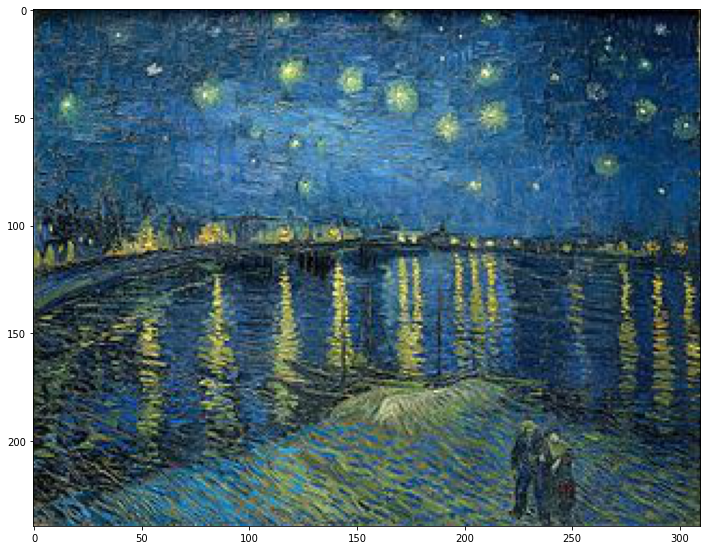

In [3]:
fig = plt.figure(figsize=(15,9.5))
plt.imshow(img_tensor)
plt.show()

In [4]:
def get_poly_image(row_ranges, im, quad_order, color_code):
    im = im[row_ranges, :, :]
    data = np.asarray(im)
    r, c, _ = im.shape
    
    image_data = np.zeros((r, c)) 
    indices = np.zeros((r, c))
    counter = 0
    for i in range(0, r):
        for j in range(0, c):
            image_data[i, j] = im[i][j][color_code]
            indices[i, j] = counter
            counter = counter + 1
    true_y = image_data.reshape(r*c, 1)
    true_x = indices.reshape(r*c, 1)
    
    p = Parameter(lower=0, upper=r*c-1, order=quad_order, distribution='uniform')
    b = Basis('univariate')
    poly = Poly(p, b, method='numerical-integration')
    pts = poly.get_points()
    fevals = np.zeros((pts.shape[0], 1))
    for i in range(0, pts.shape[0]):
        fevals[i] = true_y[int(np.round(pts[i]))]
        
    poly.set_model(fevals)
    image_estimate = np.clip(poly.get_polyfit(true_x), 0, 255)
    polyimage = image_estimate.reshape(r, c)
    return polyimage, image_estimate, true_y, true_x, np.round(pts), fevals, poly

In [5]:
rows_used = 5
number_of_elements = int(rows/rows_used)
highest_quadrature_order = rows_used * columns
print(number_of_elements, highest_quadrature_order)

48 1550


In [6]:
quadrature_order = 700

In [7]:
channels = 3
RGB = np.zeros((rows, columns, channels))
for k in range(0, channels):
    counter_0 = 0
    counter_1 = rows_used
    increment = counter_1 - counter_0
    for i in range(0, number_of_elements):
        row_values = np.arange(counter_0, counter_1)
        M, polyfit_values, true_values, true_x, pts, fevals, polyobject = get_poly_image(row_values, img_tensor, quadrature_order, color_code=k)
        RGB[counter_0: counter_1, :, k] = M
        counter_0 = counter_1
        counter_1 = counter_1 + increment

In [8]:
from scipy.misc import toimage
polyimage = toimage(RGB)

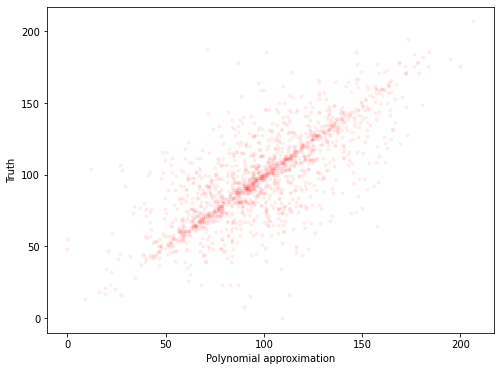

In [15]:
fig = plt.figure(figsize=(8,6))
plt.plot(polyfit_values, true_values, 'ro', ms=3, markeredgecolor=None, alpha=0.05)
plt.xlabel('Polynomial approximation')
plt.ylabel('Truth')
plt.savefig('compare_2.png', dpi=100)
plt.show()

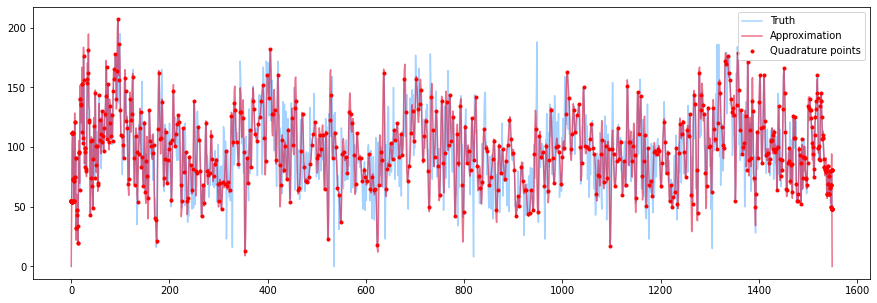

In [10]:
fig = plt.figure(figsize=(15,5))
plt.plot(true_x, true_values, color='dodgerblue', label='Truth', alpha=0.4)
plt.plot(true_x, polyfit_values, color='crimson', label='Approximation', alpha=0.6)
plt.plot(pts, fevals, 'ro', ms=3, markeredgecolor=None, label='Quadrature points')
plt.legend()
plt.savefig('compare.png', dpi=150)

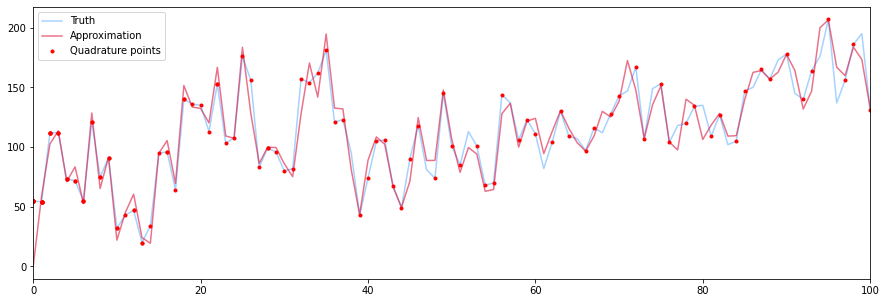

In [11]:
fig = plt.figure(figsize=(15,5))
plt.plot(true_x, true_values, color='dodgerblue', label='Truth', alpha=0.4)
plt.plot(true_x, polyfit_values, color='crimson', label='Approximation', alpha=0.6)
plt.plot(pts, fevals, 'ro', ms=3, markeredgecolor=None, label='Quadrature points')
plt.legend()
plt.xlim([0, 100])
plt.show()

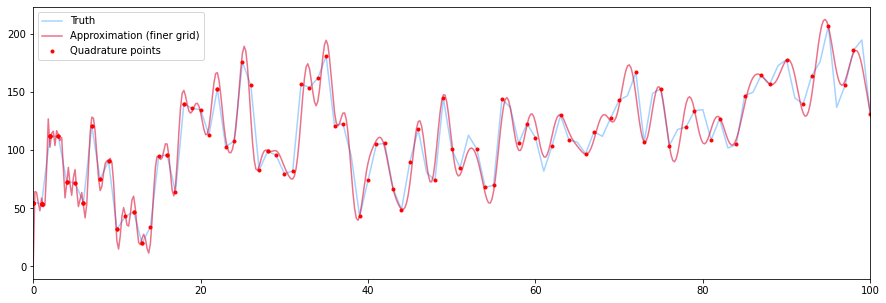

In [12]:
new_x = np.linspace(0, highest_quadrature_order, \
                    highest_quadrature_order*5).reshape(highest_quadrature_order*5, 1)
fig = plt.figure(figsize=(15,5))
plt.plot(true_x, true_values, color='dodgerblue', label='Truth', alpha=0.4)
plt.plot(new_x, np.clip(polyobject.get_polyfit(new_x), 0, 255), color='crimson', label='Approximation (finer grid)', alpha=0.6)
plt.plot(pts, fevals, 'ro', ms=3, markeredgecolor=None, label='Quadrature points')
plt.legend()
plt.xlim([0, 100])
plt.show()

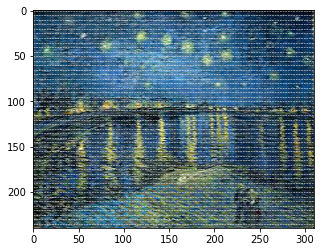

In [13]:
v = np.linspace(0, columns, columns).reshape(columns, 1)
fig = plt.figure()
for i in range(0, rows, rows_used):
    plt.plot(v, v*0 + i, 'w--', lw=0.5)
H = plt.imshow(polyimage)
plt.xlim([0, columns])
plt.savefig('approx.png' , dpi=200, bbox_inches='tight')

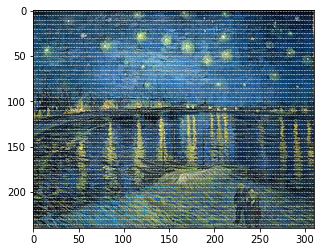

In [14]:
fig = plt.figure()
plt.imshow(img_tensor)
for i in range(0, rows, rows_used):
    plt.plot(v, v*0 + i, 'w--', lw=0.5)
plt.xlim([0, columns])
plt.savefig('rows.png' , dpi=200, bbox_inches='tight')